In [2]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import struct, os

In [17]:
def load_mnist(path, kind = 'train'):
    labels_path = os.path.join(path, "%s-labels-idx1-ubyte"%kind)
    images_path = os.path.join(path, "%s-images-idx3-ubyte"%kind)
    # label
    with open(labels_path, 'rb') as la_path:
        magic, n = struct.unpack(">II", la_path.read(8))
        labels = np.fromfile(la_path, dtype = np.uint8)
    # image
    with open(images_path, 'rb') as img_path:
        magic, num, rows, cols = struct.unpack(">IIII", img_path.read(16))
        images = np.fromfile(img_path, dtype = np.uint8).reshape(len(labels), 28**2)
        images = ((images / 255) - 0.5) * 2
    return images, labels

In [20]:
X_train, y_train = load_mnist("./", kind = 'train')
X_test, y_test = load_mnist("./", kind = 't10k')
print(X_train.shape[0], X_train.shape[1])
print(X_test.shape[0], X_test.shape[1])

60000 784
10000 784


In [21]:
mean_vals = np.mean(X_train, axis = 0)
std_val = np.std(X_train)
X_train_centered = (X_train - mean_vals) / std_val
X_test_centered = (X_test - mean_vals) / std_val

In [22]:
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_train_onehot[:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
# DNN
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(
    units = 50, 
    input_dim = X_train_centered.shape[1], 
    kernel_initializer = 'glorot_uniform', 
    bias_initializer = 'zeros', 
    activation = 'tanh'
))
model.add(tf.keras.layers.Dense(
    units = 50, 
    input_dim = 50, 
    kernel_initializer = 'glorot_uniform', 
    bias_initializer = 'zeros', 
    activation = 'tanh'
))
model.add(tf.keras.layers.Dense(
    units = 10, 
    input_dim = 50, 
    kernel_initializer = 'glorot_uniform', 
    bias_initializer = 'zeros', 
    activation = 'softmax'
))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [27]:
sgd_optimizer = tf.keras.optimizers.SGD(lr = 0.0001, decay = 1e-7, momentum = 0.9)
model.compile(optimizer = sgd_optimizer, loss = "categorical_crossentropy")

In [28]:
model.fit(X_train_centered, y_train_onehot, batch_size = 64, epochs = 50, verbose = 1, validation_split = 0.1)

Epoch 1/50
844/844 [==============================] - 1s 1ms/step - loss: 1.6270 - val_loss: 1.1053
Epoch 2/50
844/844 [==============================] - 1s 1ms/step - loss: 0.9962 - val_loss: 0.7960
Epoch 3/50
844/844 [==============================] - 1s 1ms/step - loss: 0.7879 - val_loss: 0.6483
Epoch 4/50
844/844 [==============================] - 1s 1ms/step - loss: 0.6736 - val_loss: 0.5599
Epoch 5/50
844/844 [==============================] - 1s 1ms/step - loss: 0.5999 - val_loss: 0.5005
Epoch 6/50
844/844 [==============================] - 1s 1ms/step - loss: 0.5478 - val_loss: 0.4579
Epoch 7/50
844/844 [==============================] - 1s 1ms/step - loss: 0.5088 - val_loss: 0.4257
Epoch 8/50
844/844 [==============================] - 1s 1ms/step - loss: 0.4783 - val_loss: 0.4001
Epoch 9/50
844/844 [==============================] - 1s 1ms/step - loss: 0.4537 - val_loss: 0.3794
Epoch 10/50
844/844 [==============================] - 1s 1ms/step - loss: 0.4335 - val_loss: 0.3623

In [32]:
y_train_pred = model.predict_classes(X_train_centered, verbose = 0)
y_train_pred[:3]
y_test_pred = model.predict_classes(X_test_centered, verbose = 0)

In [30]:
y_train[:3]

array([5, 0, 4], dtype=uint8)

In [33]:
total_predicts = np.sum(y_test == y_test_pred, axis = 0)
print(total_predicts)

test_res = total_predicts / y_test.shape[0]
print(test_res)

9320
0.932


In [35]:
# 틀린거 찾아보기
n = 0
for i, y in enumerate(y_test):
    if y != y_test_pred[i]:
        print(i, y, y_test_pred[i])
        n += 1
print(n)

8 5 6
33 4 6
66 6 7
92 9 4
124 7 4
149 2 9
193 9 3
195 3 5
217 6 5
233 8 7
241 9 8
245 3 5
247 4 6
259 6 0
290 8 4
313 3 5
320 9 7
321 2 7
340 5 3
341 6 4
352 5 0
358 7 9
359 9 4
380 0 5
381 3 7
403 8 5
412 5 3
444 2 8
445 6 0
448 9 8
449 3 5
478 5 8
479 9 3
495 8 0
502 5 3
507 3 5
511 4 8
530 9 4
531 3 6
543 8 3
551 7 1
565 4 9
578 3 2
582 8 2
591 8 3
619 1 8
628 3 9
629 2 6
659 2 9
684 7 3
691 8 4
707 4 9
717 0 6
720 5 8
728 2 8
740 4 9
760 4 9
781 8 5
791 5 9
839 8 3
844 8 7
857 5 3
874 9 4
882 9 7
898 7 2
924 2 7
938 3 5
939 2 0
947 8 9
950 7 2
956 1 3
959 4 9
965 6 0
999 9 7
1003 5 3
1014 6 5
1032 5 2
1039 7 9
1044 6 2
1050 2 6
1062 3 7
1068 8 4
1073 5 8
1082 5 3
1092 3 2
1101 8 2
1107 9 3
1112 4 6
1114 3 8
1119 7 2
1124 8 7
1125 8 9
1128 3 7
1131 5 4
1173 7 9
1181 6 1
1182 6 8
1185 8 9
1191 0 4
1192 9 4
1194 7 9
1198 8 4
1200 8 5
1202 8 5
1204 3 2
1206 7 2
1208 3 9
1226 7 2
1232 9 4
1234 8 5
1242 4 9
1243 5 6
1247 9 0
1256 2 3
1260 7 1
1283 7 2
1289 5 9
1299 5 7
1319 8 3
1326 7 2

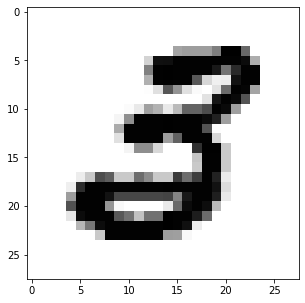

In [47]:
plt.figure(figsize = (5,5))
image = np.reshape(X_test[5054], [28, 28])
plt.imshow(image, cmap = 'Greys')
plt.show()

## 학습(이전 학습 내용을 반영하기때문에)을 잘못하면 너무 명백한 예측도 잘 하지못하게된다.

In [ ]:
# CNN (Convolutional Neural Network)

In [48]:
from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (5,5), padding = 'valid', activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPool2D(2, 2))       # 사진 줄이기
model.add(layers.Conv2D(64, (5,5), padding = 'valid', activation = 'relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())             #### 2번 ~ 3번이면 충분함
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dropout(0.5))                    ### overfit 방지, 일반화된 이미지를 도출
model.add(layers.Dense(10, activation = 'relu'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)             